## Homework 02

### Exercise 1
One half percent of the population has a coronavirus and a test is being developed. This test gives a false positive $3\%$ of the time and a false negative $2\%$ of the time. 

1. Find the probability that Luca is positive to the test.
2. Suppose Luca is positive to the test. What is the probability that he has contracted the disease?

## Solution:

Given t, random variable of test result, and L, rand .var. of Luca state, both can be either + or - .

Then $P(FP)  = P (t = + | L = -)$ and $P(FN) = P (t = - | L = +)$.

1.
$$
P(t = +) = P (t = + | L = +) \, P(L = +) + P (t = + | L = -) \, P(L = -) = (1 - P(FN)\,) (0.005) + P(FP) (0.995)\approx 0.035 
$$

2.

$$
P(L = + | t = +) = \frac{P(t=+|L=+) \, P(L=+)}{P(t=+)} = \frac{0.998\,\, 0.005}{0.035} \approx 0.14
$$

### Exercise 2

Implement the empirical cumulative distribution function $F_X(x)=$ `cdf(dist, x)` taking as inputs a `pyro.distributions` object `dist`, corresponding to the distribution of $X$, and a real value `x`.

Suppose that $X\sim \mathcal{N}(0,1)$ and plot $F_X(x=1)$.

Populating the interactive namespace from numpy and matplotlib


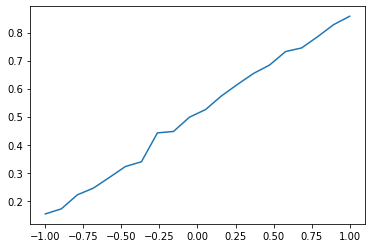

In [1]:
%pylab inline
import pyro, torch

def cdf(dist: pyro.distributions, x: float, tries: int = 1000):
    sample = [pyro.sample("s",dist) for i in range(tries)]
    function = lambda y: 1 if y.item()-x <= 1e-16 else 0
    is_less = map(function, sample)
    return np.sum(list(is_less)) / tries
    
standard = pyro.distributions.Normal(0, 1)
axis = linspace(-1,1,20)
results  = [cdf(standard,x) for x in axis]

plot([x for x in axis], results)

### Exercise 3

Suppose the heights of male students are normally distributed with mean $180$ and unknown variance $\sigma^2$. Suppose that $\sigma^2$ is in the range $[22,41]$ with approximately $95\%$ probability and assign to $\sigma^2$ an inverse-gamma $IG(38,1110)$ prior distribution .

1. Empirically verify that the parameters of the inverse-gamma distribution lead to a prior probability of approximately $95\%$ that  $\sigma^2\in[22,41]$.
2. Derive the posterior density of $\sigma^2$ corresponding to the following data: $183, 173, 181, 170, 176, 180, 187, 176, 171, 190, 184, 173, 176, 179, 181, 186$.
Then plot it together with the prior density.
3. Compute the posterior density of the standard deviation $\sigma$.

verification for 1k elements of sample: 0.943

 All the functions are not distributions since they're not normalized

 Posterior mean has sensibly decreased, variance is hugely decreased w.r.t. prior


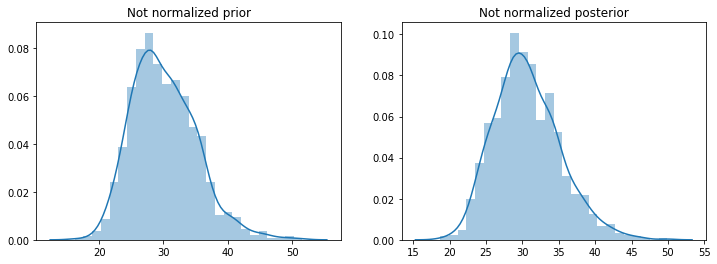

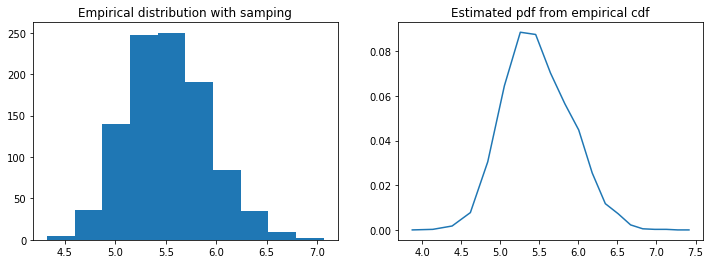

In [14]:
alpha = 38
beta = 1110
start = 22
end = 41
mu = 180
prior = pyro.distributions.InverseGamma(38,1110)
h_sample = array([183,173,181,170,176,180,187,176,171,190,184,173,176,179,181,186])

#part 1:
cumulative_end = cdf(prior, end)
cumlative_start = cdf(prior, start)
print("verification for 1k elements of sample: " + str(cumulative_end - cumlative_start))

#since inverse gamma is conjugate prior for Normal Likelihood of known mean, we know
new_alpha = alpha + len(h_sample) / 2
new_beta = beta + (np.sum(((h_sample - mu)**2)) / 2)
posterior = pyro.distributions.InverseGamma(new_alpha, new_beta)

tries = 1000
prior_samples = [pyro.sample("prior", prior) for i in range(tries)]
posterior_samples = [pyro.sample("post", posterior) for i in range(tries)]

import seaborn as sns


print("\n All the functions are not distributions since they're not normalized")
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.distplot(prior_samples, ax=axes[0])
sns.distplot(posterior_samples, ax=axes[1])
axes[0].set_title('Not normalized prior')
axes[1].set_title('Not normalized posterior')
plt.show()



#part 3: solution a: empirical distribution from sampling
st_dev_sample = [sqrt(i) for i in posterior_samples]

#solution b : distribution from empirical cdf
    #P (sigma^2 < n) = P(sigma < sqrt(n)) because they correspond to same event (sigma positive)
data_dim = 20
st_dev_posterior_cumulative = [cdf(posterior, x, tries) for x in linspace(15,55,data_dim)]
estimated_pdf = np.gradient(st_dev_posterior_cumulative, 40/data_dim)


fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(st_dev_sample)
#axes[0].set_xlim(left=15, right=55)
#axes[1].set_xlim(left=15, right=55)
axes[1].plot([sqrt(x) for x in linspace(15,55,data_dim)], estimated_pdf)
axes[0].set_title('Empirical distribution with samping')
axes[1].set_title('Estimated pdf from empirical cdf')
plt.show()

### Exercise 4

Prove that the Gamma distribution is the conjugate prior distribution for the Exponential likelihood.

## Solution:
$$
\newcommand{\l}{\lambda}
\newcommand{\x}{\vec{x}}
\newcommand{\a}{\alpha}
\newcommand{\b}{\beta}
$$

$$
P(\l | \x) = \frac{P(\x|\l) P(\l)}{P(\x)} = \frac{(\l e^ {-\l \sum_i x_i}) \, \l^{\a-1} e^{- \b \l}}{\int d \l \, numerator} 
$$

notice that some factors ($\Gamma(\a)^{-1},\b^\a$) has been simplified. The numerator can be rewritten, introducing $z = z(\x)= \b + \sum_i x_i$, then 

$$
P(\x|\l) P(\l) = \l^\a e^{-\l z}
$$

so $P(\x) = \int_0^{\infty} d\l  \l^\a e^{-\l z}$. Multiplying and dividing for $z^\a$ and changing varialble in $y=z\l$, u get:

$$
P(\x) = \frac{\Gamma (\a + 1)} {z^{\a+1}} 
$$

then the posterior $P(\l | \x)$ is

$$
P(\l | \x) = \frac{z(\x)^{a+1} \l ^\a e^{-\l z(\x)}}{\Gamma(\a+1)}
$$

which is a Gamma distribution over $\l$ with parameters $\tilde{\a}= \a+1$ and $\tilde{\beta}= z = \beta + \sum_i x_i$